In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [2]:
all_AVA_muts = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

5676

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'PhoP': ['ECK125162...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantly associ...",{'translation': ['rplKAJL-rpoBC']},"[{'name': '2.7.7.6'

In [3]:
from collections import Counter
mut_type_cnt_d = dict(Counter(all_AVA_muts["Mutation Type"]))
mut_type_cnt_df = pd.DataFrame.from_dict(mut_type_cnt_d, orient='index', columns=["count"])
mut_type_cnt_df

,count
DEL,894
SNP,3961
INS,436
MOB,297
SUB,87
AMP,1


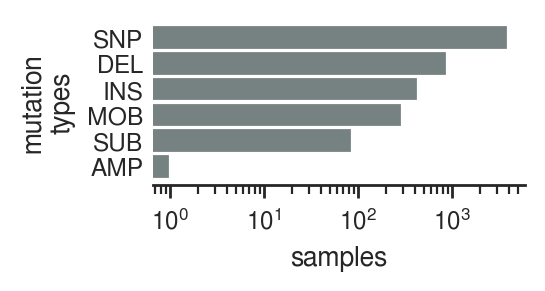

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("ticks")

cnt_df = mut_type_cnt_df.copy()
cnt_df = cnt_df.sort_values(by="count", ascending=True)

ax = cnt_df.plot.barh(
    color="#768281",
    figsize=(2.4,1.1),
    width=0.95
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()
for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")
plt.xscale('log')

ax.set_ylabel("mutation\ntypes", fontname="FreeSans")
ax.set_xlabel("samples", fontname="FreeSans")

ax.tick_params(axis='y', which='both', length=0)


# cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
# for i, r in cnt_df.iterrows():
#     s = str(int(r["count"]))
#     ax.text(r["count"], i-0.3,  s, fontname="FreeSans")

In [5]:
from Bio import SeqIO


recs = [rec for rec in SeqIO.parse("../data/NC_000913_3.gb", "genbank")]

mob_sizes = dict()

for rec in recs:
    feats = [feat for feat in rec.features if feat.type == "mobile_element"]
    for feat in feats:
        for annot in feat.qualifiers["mobile_element_type"]:
            mob_name = annot.replace("insertion sequence:",'')
            if mob_name[-1].isdigit() == False:  # Removing annotations describing separate instances of a MOB.
                mob_name = mob_name[:-1]
            mob_size = len(feat.location)
            if mob_name not in mob_sizes.keys():  # Assuming that all MOBs have the same length.
                mob_sizes[mob_name] = mob_size
mob_sizes

{'IS186': 1345,
 'IS1': 768,
 'IS911': 335,
 'IS30': 1221,
 'IS5': 1195,
 'IS': 312,
 'IS3': 1255,
 'IS2': 1331,
 'IS609': 1748,
 'IS5L': 1195,
 'IS150': 1443,
 'IS4': 1426,
 'IS600': 327}

In [6]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_SNP_aa_pos, get_DEL_INS_MOB_aa_start_pos, is_coding_mut, is_genetic_mut, get_mut_size, STRUCTURAL_LEVEL, get_gene_count, get_mob_size


all_AVA_muts["AA range"] = None
all_AVA_muts["genetic"] = all_AVA_muts["Details"].apply(is_genetic_mut)
all_AVA_muts["coding"] = all_AVA_muts["Details"].apply(is_coding_mut)
all_AVA_muts["mutation size"] = all_AVA_muts.apply(get_mut_size, axis=1)  # get_mut_size currently doesn't return MOB mut sizes. Isn't something currently necessary.
all_AVA_muts["mutation size"] = all_AVA_muts.apply(lambda r: get_mob_size(r["Sequence Change"], mob_sizes) if r["Mutation Type"] == "MOB" else r["mutation size"], axis=1)
all_AVA_muts["gene count"] = all_AVA_muts.apply(lambda r: get_gene_count(r.rename({"Gene": 'mutation target annotation'})), axis=1) # The renaming is temporary because get_gene_count(...) expects it
all_AVA_muts.head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,AA range,mutation size,gene count
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'PhoP': ['ECK125162...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),None,21,1
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),None,1,1
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),None,82,1
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantly ass

In [7]:
all_AVA_muts["mutation genomic feature count"] = all_AVA_muts.apply(lambda m: len(m["genomic features"]), axis=1)

In [8]:
mut_size_df = pd.DataFrame()
for _, m in all_AVA_muts.iterrows():
    srs = pd.Series({
        "Mutation Type": m["Mutation Type"],
        "count type": "mutation size",
        "count type size": m["mutation size"]
    })
    mut_size_df = mut_size_df.append(srs, ignore_index=True)
    srs = pd.Series({
        "Mutation Type": m["Mutation Type"],
        "count type": "mutation genomic feature count",
        "count type size": m["mutation genomic feature count"]
    })
    mut_size_df = mut_size_df.append(srs, ignore_index=True)
    
mut_size_df

,Mutation Type,count type,count type size
0,DEL,mutation size,21.0
1,DEL,mutation genomic feature count,1.0
2,SNP,mutation size,1.0
3,SNP,mutation genomic feature count,1.0
4,DEL,mutation size,82.0
...,...,...,...
11347,DEL,mutation genomic feature count,1.0
11348,DEL,mutation size,1.0
11349,DEL,mutation genomic feature count,1.0
11350,SNP,mutation size,1.0


In [9]:
mut_size_df["Mutation Type"] = mut_size_df["Mutation Type"].apply(lambda mt: "CNV" if mt == "AMP" else mt)

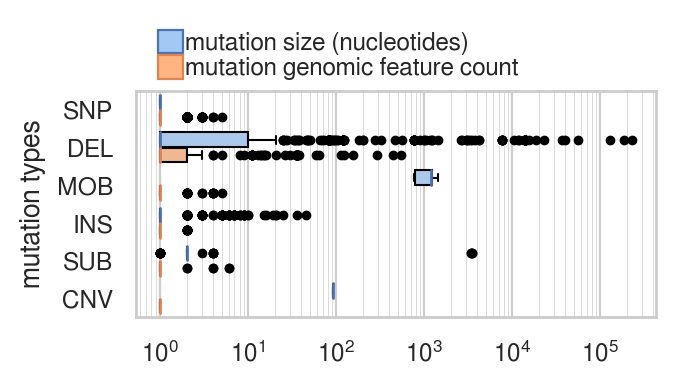

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.set_palette("muted")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}

pal = {"mutation size": "#A1C9F4", "mutation genomic feature count": "#FFB482"}


fig, ax = plt.subplots(figsize=(3.35, 1.5))
sns.boxplot(
    ax=ax,
    data=mut_size_df,
    x="count type size",
    y="Mutation Type",
    hue="count type",
    order=["SNP", "DEL", "MOB", "INS", "SUB", "CNV"],
    palette=pal,
    **boxplot_kwargs
)
# ax.set_title("Mutated non-coding features\nare often involved in significant convergence")

ax.set_ylabel("mutation types", fontname="FreeSans")
ax.xaxis.label.set_visible(False)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.set_xscale('log')

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")


from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#A1C9F4', edgecolor='#4C72B0', label='mutation size (nucleotides)'),
    Patch(facecolor='#FFB482', edgecolor='#DD8452', label='mutation genomic feature count'),
]

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0
plt.rcParams['legend.title_fontsize'] = 9
ax.legend(
    frameon=False,
    handles=legend_elements,
    bbox_to_anchor=(0, 0.95, 1, 0.102)
)


# The below sets the medians to different colors
for line in ax.get_lines()[4::12]:
    line.set_color('#4C72B0')
for line in ax.get_lines()[10::12]:
    line.set_color('#DD8452')

    
plt.savefig("../figs/gdmuts_f3s2.svg", format="svg")